# The Feedback Equation!

![feedbackloop](feedbackloop.png "Feedback")
$$
\begin{align}
y(s) &= P(s) \Big( u(s) + d(s) \Big) \\
&= P(s)K(s) \Big( r(s) - y_m(s) \Big ) + P(s)d(s) \\
&= P(s)K(s) r(s) - P(s)K(s) y_m(s) + P(s)d(s) \\
&= P(s)K(s)r(s) - P(s)K(s)\Big(y(s) + n(s)\Big) + P(s)d(s) \\
&= P(s)K(s)r(s) - P(s)K(s)y(s)  - P(s)K(s) n(s)+ P(s)d(s) \\
&= \underbrace{\frac{P(s)K(s)}{1+P(s)K(s)}}_{\substack{\text{closed-loop} \\ \text{transfer function}}} r(s) - \frac{P(s)K(s)}{1+P(s)K(s)}n(s) + \frac{P(s)}{1+P(s)K(s)}d(s)
\end{align}
$$

Loop transfer function:

$$L(s) = P(s)K(s)$$

Sensitivity Function:

$$S(s) = \frac{1}{1+P(s)K(s)} = \frac{1}{1 + L}$$ 

Complementary Sensitivity Function:

$$T(s) = \frac{P(s)K(s)}{1+P(s)K(s)} = \frac{L}{1+L}$$ 

Express feedback equation in terms of $T$ and $S$:

$$y(s) = T(s)r(s) - T(s)n(s) + S(s)P(s)d(s)$$


# Tracking Error

Interestingly, we can compare the actual output, $y$, with the desired output, $r$! 
- This is called the tracking error. 
- Normally, we want the tracking error to be small. 

In equations:

$$
\begin{align}
\varepsilon(s) &= r(s) - y(s) \\
&= r(s) -  T(s)r(s) + T(s)n(s) - S(s)P(s)d(s) \\
&= S(s)r(s) + T(s)n(s) - S(s)P(s)d(s)
\end{align}
$$

# Key insight (this is important):
- $S(s)$ determines the error due to not tracking $r$ 
- $S(s)$ determines the error due to process disturbances $d$
- $T(s)$ determines the error due to measurement noise $n$

# We want both $S(s)$ and $T(s)$ to be small!!
# However $S(s) + T(s) = 1$. 

(so we can't make both small at the same time...)


# In Class Activity!

Prove that $S(s) + T(s) = 1$.

# So far
- have illustrated the advantages of control (increase performance, disturbance rejection, increased robustness)
- Studied feedback equation and looked at the dynamics of the tracking error (sensitivity and complementary sensitivity functions)

# Next Step:
- let's look at some ideas for choosing the controller $K$. 
- will look at 2 ideas based directly on our understanding of the feedback equation. 
- objective is to develop an understanding how controllers can affect the tracking error.

# First attempt: Proportional Control

# Let's design $K$! (Idea 1)

There are several possibilities to obtain this desired behaviour:

choose $K$ as a (large) constant.

$$\varepsilon(s) = \frac{1}{1+K(s)P(s)}r(s) - \frac{K(s)P(s)}{1+K(s)P(s)}n(s) - \frac{P(s)}{1+K(s)P(s)}d(s)$$



# In Class Activity!

Use code below to try different values of $K$

In [1]:
import control as ct
import numpy as np
import enel441_utilities as eu
import math
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# Very simple model of a car (input = force applied by wheels, output = speed of car)
m = 1000 #kg
k = 500 #Ns/m

s = ct.tf('s')
Car = 1/(m*s+k)

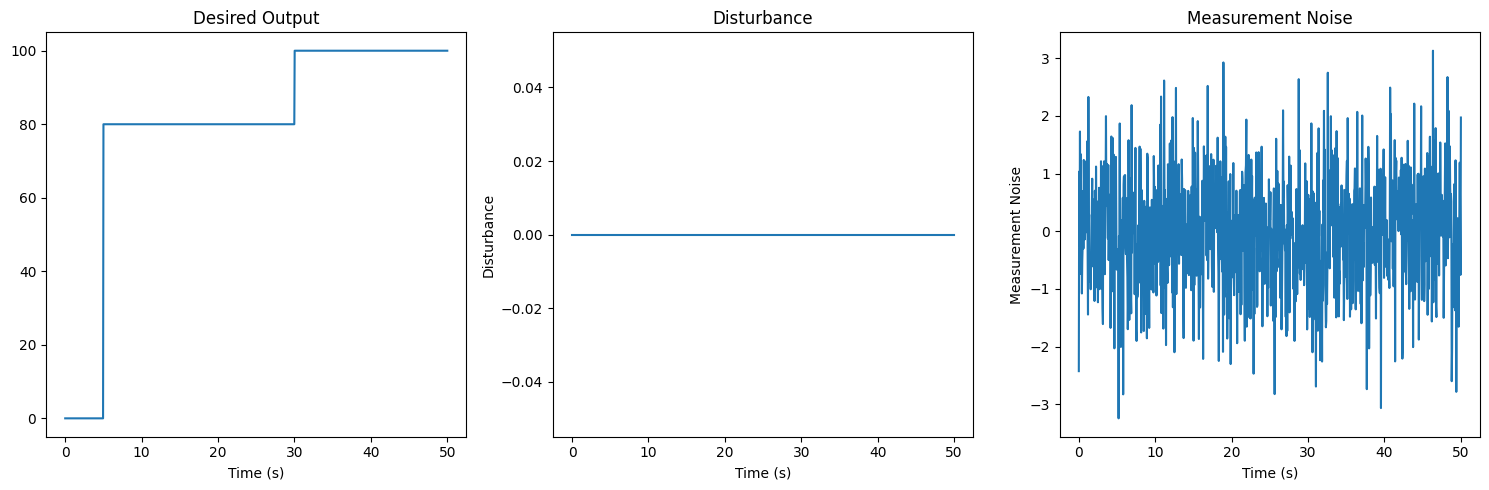

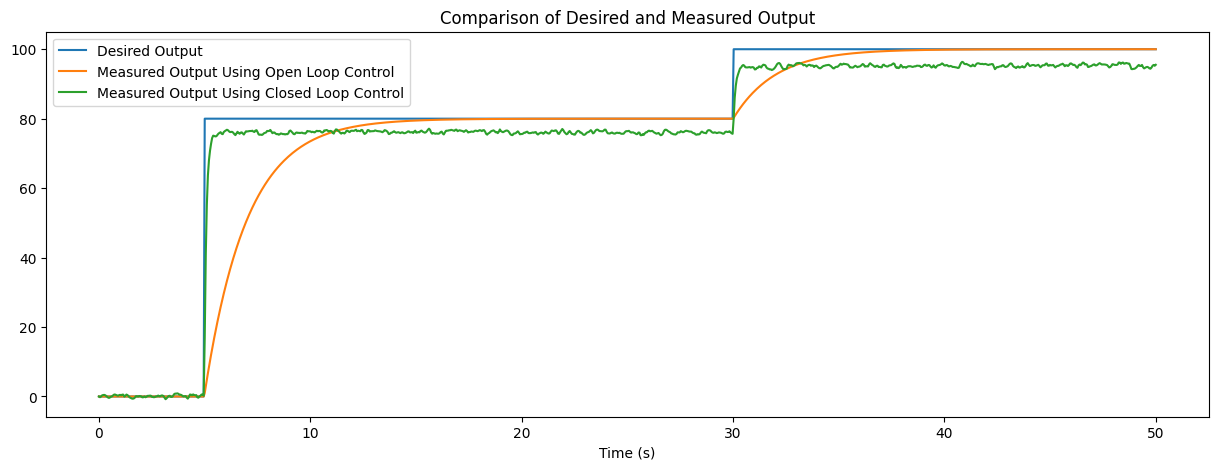

In [3]:
# Reference, disturbance and measurement noise signals
N = 1000
t = np.linspace(0, 50, N)
r = [0 if ti <= 5 else
     80 if ti <= 30 else
     100 for ti in t]
r = np.array(r)
d = np.zeros(N)
n = np.random.randn(N)

# try different controllers
K = 10000

y_closed_loop, u_closed_loop = eu.enel441_sim_closed_loop(Car,K,t,r,d,n)
y_open_loop = eu.enel441_sim_open_loop(Car,t,r*k,d)
    
eu.enel441_make_open_and_closed_loop_plots(t,r,d,n,y_closed_loop,y_open_loop)

# What do you notice? 

Can we explain this behavior? 

Some observations:
- for small $K$, the steady state error is very big. Why? 

Let's obtain an expression for the steady state error to find out why. The steady state error is $\varepsilon(\infty)$ with $r(t)$ a step function $v_{des} 1(t)$, and assume $n$ and $d$ are zero. Then:
$$
\begin{align*}
\mathcal{E}(s) &= S(s)R(s) \\
&= \frac{1}{1 + P(s)K} \frac{v_{des}}{s} \\
&= \frac{v_{des}(ms + k)}{s(ms + k + K)} 
\end{align*}
$$
Use the Laplace transform property to calculate $\varepsilon(\infty)$:
$$
\begin{align*}
\varepsilon(\infty) &= \lim_{s \to 0} s \frac{v_{des}(ms + k)}{s(ms + k + K)} 
&= \frac{v_{des} k}{k + K}
\end{align*}
$$
So we see for small $K$, we have a large steady state error, whereas for large $K$ we have a small steady state error, just as we observed in the simulations!

# What behaviors are possible by changing K? 

And what behaviors are not possible? 

Idea: plot possible poles and zeros of closed-loop transfer function in the s-plane.

This is called a Root Locus Plot. 

# In Class Activity

We have seen that the transfer function from $r$ to $y$ is equal to the complementary sensitivity function $T(s)$. Now express the plant (i.e. the car) as $P(s) = \frac{B(s)}{A(s)}$. In addition, let $K$ be a constant (i.e. not a function of $s$). Derive an expression for $Y(s)$ assuming that $d$ and $n$ are zero. 

From feedback equation, the transfer function from $r$ to $y$ is just $T$, so we have:
$$
\begin{align*}
Y(s) &= T(s)R(s) \\
&= \frac{P(s)K}{1 + P(s)K}
\end{align*}
$$

Express $P(s) = \frac{B(s)}{A(s)}$:
$$
\begin{align*}
Y(s) &= \frac{\frac{B(s)}{A(s)}K}{1 + \frac{B(s)}{A(s)}K} \\
&= \frac{KB(s)}{A(s) +B(s)K}
\end{align*}
$$

This is an expression of the closed-loop transfer function as a function of $K$ (where $K$ is a constant). What do we observe?
- poles of closed loop system depend on $K$
- this expression defines what behaviors we can obtain using a proportional controller (i.e. constant $K$)

We want to visualize the possible behaviors somehow! (and know what the limitations are of using a proportional controller)



2. Plot poles and zeros for a whole range of $K$ in the s-plane. This is called a Root Locus plot.

Numerator: [0. 1.]
Denominator: [1000  500]


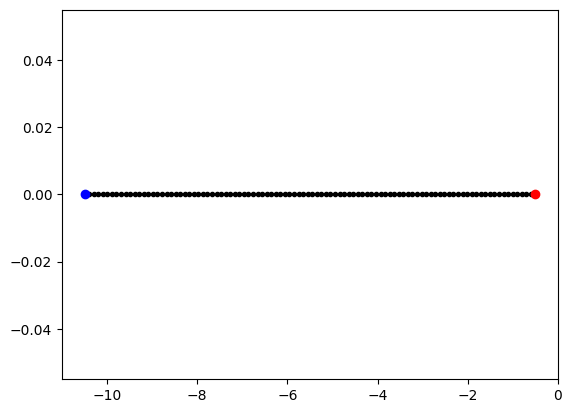

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def enel441_root_locus(num,den,k_range):
    N = len(k_range)

    if len(num) == len(den):
        print('Nothing to do.')
        num_padded = num
        print(num)
        print(den)
    else:
        num_padded = np.concatenate((np.zeros(len(den)-len(num)), num))
        print('Numerator:', num_padded)
        print('Denominator:', den)

    closed_loop_poles = np.zeros((N,den.shape[0]-1),dtype=np.csingle)
    for ii in range(N):
        den_closed_loop = den + k_range[ii]*num_padded
        closed_loop_poles[ii,:] = np.roots(den_closed_loop)
    
    fig, ax = plt.subplots(1,1)
    ax.plot(np.real(closed_loop_poles),np.imag(closed_loop_poles), 'k.' )
    ax.plot(np.real(closed_loop_poles[0,:]),np.imag(closed_loop_poles[0,:]), 'ro' )
    ax.plot(np.real(closed_loop_poles[-1,:]),np.imag(closed_loop_poles[-1,:]), 'bo' )
    return fig, ax

k_range = np.linspace(0,10000,100)
fix,ax = enel441_root_locus(Car.num[0][0],Car.den[0][0],k_range) 
plt.show()